# Customer Churn Analysis

## Context

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.


## Deliverables - What is expected

### Week 1

A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.



<ol>
    <li>How much is churn affecting the business? How big is churn compared to the existing customer base?</li>
    <li>
        Explain churn by the below categories. Are there any factors that combine to be especially impactful? 
         <ul>
            <li> a- Customer demographics like age and gender </li>
            <li> b- Services used </li>
            <li> c- Billing information </li>
    </ul>
       </li>
  <li>What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers? </li>
    <li> <b>Bonus!</b> How long will it take for the company to lose all its customers?  Which demographics will they lose first?</li>


</ol>



## By Davidson VERSAILLES

## Deliverables

### Imports all librairies need


In [28]:
# for data preprocessing and dataframe computation
import pandas as pd 
# for matrix and vector transformation and computation
import numpy as np 
# for plotting and graph and viz
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessiong 
from sklearn.preprocessing import LabelEncoder, StandardScaler
# for data modeling ,testing and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from warnings import warn
from scipy.sparse import issparse

from sklearn.ensemble.base import BaseEnsemble, _partition_estimators
from sklearn.utils import check_array, check_random_state, compute_sample_weight
from sklearn.utils.multiclass import check_classification_targets
from sklearn.utils.validation import DataConversionWarning, NotFittedError
from sklearn.externals import six

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from joblib import Parallel, delayed


In [29]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


### Improve data preprocessing

In [30]:
# import dataset
df=data_churn = pd.read_csv("datasets/churn_dataset.csv")

In [31]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
data_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [34]:
data_churn.shape

(7043, 21)

In [35]:
data_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

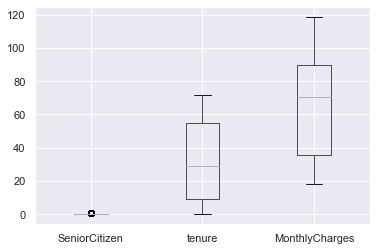

In [36]:
data_churn.boxplot()

In [37]:
data_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### How much is churn affecting the business? How big is churn compared to the existing customer base?

In [38]:
df = data_churn[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df['MonthlyCharges'].sum()
df

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


In [39]:
df = data_churn[['Churn']].groupby(['Churn']).size()/data_churn['Churn'].count()
df

Churn
No     0.73463
Yes    0.26537
dtype: float64

In [40]:
df_churned = data_churn[data_churn.Churn == 'Yes']
df_churned.MonthlyCharges.sum()

139130.85

In [41]:
data_churn[['TotalCharges']].sum()

TotalCharges    29.851889.5108.151840.75151.65820.51949.4301.9...
dtype: object

In [42]:
### covert totalcharges in flot 


## Explain churn by the below categories. Are there any factors that combine to be especially impactful? 

In [43]:
churn_yes = data_churn[data_churn['Churn']=='Yes']

In [44]:
churn_yes.shape

(1869, 21)

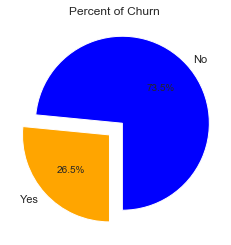

In [45]:
# How much is churn affecting the business
# Data to plot
sizes = data_churn['Churn'].value_counts(sort = True)
colors = ["blue","orange"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of Churn ')
plt.show()

In [46]:
churn_yes[['gender','SeniorCitizen']].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns ={0:"count"}).reset_index()

,gender,SeniorCitizen,count
0,Female,0,699
1,Female,1,240
2,Male,0,694
3,Male,1,236


In [47]:
churn_yes[['Dependents','SeniorCitizen']].groupby(['Dependents','SeniorCitizen']).size().to_frame().rename(columns ={0:"count"}).reset_index()

,Dependents,SeniorCitizen,count
0,No,0,1089
1,No,1,454
2,Yes,0,304
3,Yes,1,22


Text(0.5, 1.0, 'yyyy')

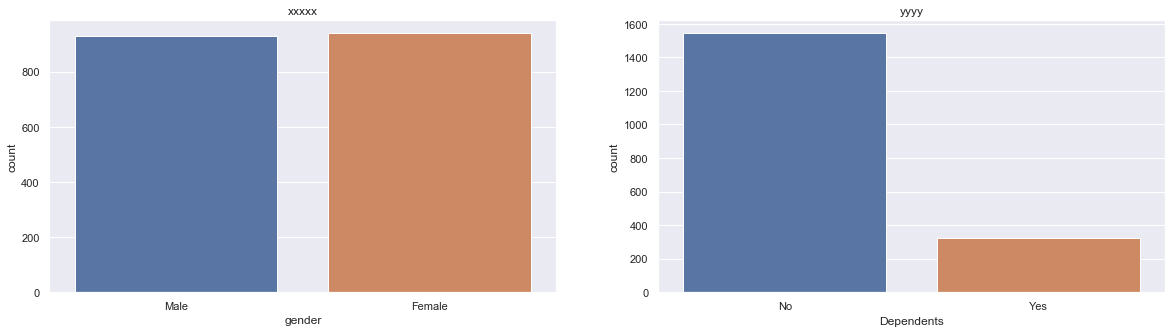

In [48]:
fig,axes =plt.subplots(1,2,figsize =(20,5))
sns.set(style="darkgrid")
ax1 = sns.countplot(x="gender", data=churn_yes ,ax=axes[0])
ax2  = sns.countplot(x="Dependents" , data=churn_yes ,ax=axes[1])
ax1.set_title("xxxxx")
ax2.set_title("yyyy")

In [49]:
#we count the value for the columns Churn
churn0=data_churn['Churn']
count_churn0=churn0.value_counts()
table_churn0= count_churn0.to_frame()
table_churn0

,Churn
No,5174
Yes,1869


In [50]:
#we count the value for the columns Gender
gend=data_churn['gender']
count_gend=gend.value_counts()
table_gend= count_gend.to_frame()
table_gend

,gender
Male,3555
Female,3488


In [51]:
#we count the value for the columns Partner
part=data_churn['Partner']
count_partner=part.value_counts()
table_part = count_partner.to_frame()
table_part

,Partner
No,3641
Yes,3402


In [52]:
#we count the value for the columns InternetService
int_serv=data_churn['InternetService']
count_intserv=int_serv .value_counts()
table_intserv = count_intserv.to_frame()
table_intserv

,InternetService
Fiber optic,3096
DSL,2421
No,1526


In [53]:
#we count the value for the columns InternetService
dependent=data_churn['Dependents']
dep= dependent.value_counts()
table_dependents = dep.to_frame()
table_dependents

,Dependents
No,4933
Yes,2110


In [54]:
#we count the value for the columns PhoneService
phoneserv=data_churn['PhoneService']
count_phoneserv= phoneserv.value_counts()
table_phoneserv = count_phoneserv.to_frame()
table_phoneserv

,PhoneService
Yes,6361
No,682


In [55]:
#we count the value for the columns MultipleLines
multpline=data_churn['MultipleLines']
count_multpline= multpline.value_counts()
table_multpline = count_multpline.to_frame()
table_multpline

,MultipleLines
No,3390
Yes,2971
No phone service,682


In [57]:
#we count the value for the columns OnlineSecurity
onlinesecu=data_churn['OnlineSecurity']
count_onlinesecu= onlinesecu.value_counts()
table_onlinesecu = count_onlinesecu.to_frame()
table_onlinesecu

,OnlineSecurity
No,3498
Yes,2019
No internet service,1526


In [58]:
#we count the value for the columns OnlineSecurity
onlinebac=data_churn['OnlineBackup']
count_onlinebac= onlinebac.value_counts()
table_onlinebac = count_onlinebac.to_frame()
table_onlinebac

,OnlineBackup
No,3088
Yes,2429
No internet service,1526


In [59]:
#we count the value for the columns OnlineSecurity
dp=data_churn['DeviceProtection']
count_dp= dp.value_counts()
table_dp = count_dp.to_frame()
table_dp

,DeviceProtection
No,3095
Yes,2422
No internet service,1526


In [60]:
#we count the value for the columns OnlineSecurity
tech =data_churn['TechSupport']
count_tech= tech.value_counts()
table_tech = count_tech.to_frame()
table_tech

,TechSupport
No,3473
Yes,2044
No internet service,1526


In [82]:
data_churn[['SeniorCitizen','Churn']].groupby(['Churn','SeniorCitizen']).size()/data_churn.Churn.count()

Churn  SeniorCitizen
0      0                0.640068
       1                0.094562
1      0                0.197785
       1                0.067585
dtype: float64

Text(0.5, 1.0, 'Customer demographics Churn by gender')

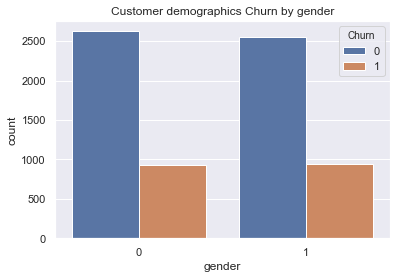

In [80]:
ax = sns.countplot(x="gender", hue="Churn", data=data_churn)
ax.set_title("Customer demographics Churn by gender")

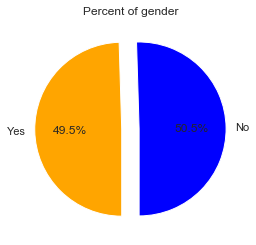

In [84]:
sizes = data_churn['gender'].value_counts(sort = True)
colors = ["blue","orange"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of gender')
plt.show()

### Customer demographics Churn by age

Text(0.5, 1.0, 'Customer demographics Churn by age')

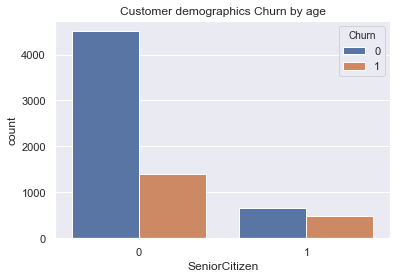

In [85]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=data_churn)
ax.set_title("Customer demographics Churn by age")

In [86]:
services= data_churn.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']).size().to_frame()
services

0
PhoneService MultipleLines InternetService OnlineSecurity      DeviceProtection    TechSupport         StreamingTV         StreamingMovies     PaperlessBilling PaymentMethod             Churn    
No           2             DSL             No                  No                  No                  No                  No                  No               Bank transfer (automatic) 0       3
                                                                                                                                                                                          1       4
                                                                                                                                                                Credit card (automatic)   0       6
                                                                                                                                                                Electronic check          0       8
                                                                                                                                                                                          1      10
...                                                                                                                                                                                              ..
Yes          1             No              No internet service No internet service No internet service No internet service No internet service Yes              Credit card (automatic)   0      36
                                                                                                                                                                                          1       2
                                                                                                                                                                Electronic check          0      12
                                                                                                                                                                Mailed check              0      30
                                                                                                                                                                                          1       2

[1507 rows x 1 columns]

### Customer demographics Churn by PhoneService

Text(0.5, 1.0, 'Customer demographics Churn by PhoneService ')

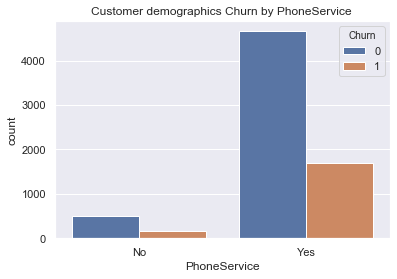

In [87]:
ax = sns.countplot(x="PhoneService", hue="Churn", data=data_churn)
ax.set_title("Customer demographics Churn by PhoneService ")

### Customer demographics  InternetService in relation to Churn or not Churn

Text(0.5, 1.0, 'Customer demographics  InternetService in relation to Churn or not Churn')

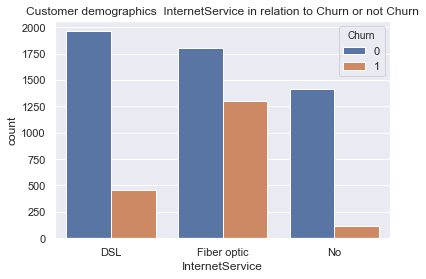

In [88]:
ax = sns.countplot(x="InternetService", hue="Churn", data=data_churn)
ax.set_title("Customer demographics  InternetService in relation to Churn or not Churn")

### Customer demographics StreamingTV in relation to Churn or not Chur

Text(0.5, 1.0, 'Customer demographics StreamingTV in relation to Churn or not Churn')

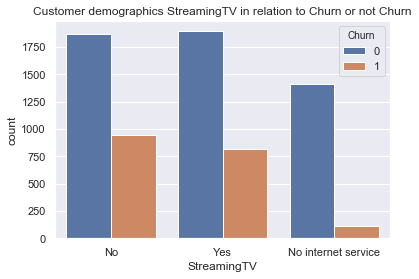

In [89]:
ax = sns.countplot(x="StreamingTV", hue="Churn", data=data_churn)
ax.set_title("Customer demographics StreamingTV in relation to Churn or not Churn")

Text(0.5, 1.0, 'Customer demographics StreamingMovies in relation to Churn or not Churn')

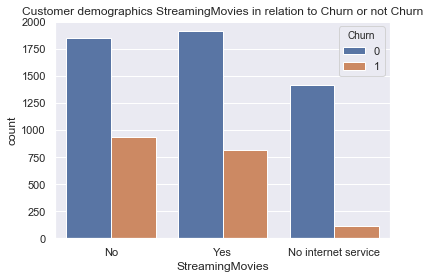

In [90]:
ax = sns.countplot(x="StreamingMovies", hue="Churn", data=data_churn)
ax.set_title("Customer demographics StreamingMovies in relation to Churn or not Churn")

Text(0.5, 1.0, 'Customer demographics  OnlineSecurity in relation to Churn or not Churn')

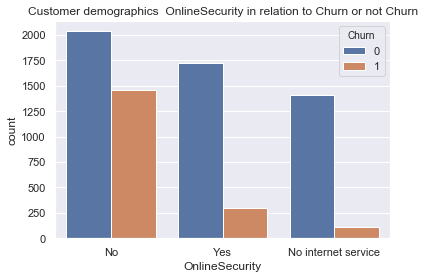

In [95]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=data_churn)
ax.set_title("Customer demographics  OnlineSecurity in relation to Churn or not Churn")

Text(0.5, 1.0, 'Customer demographics OnlineBackup in relation to Churn ')

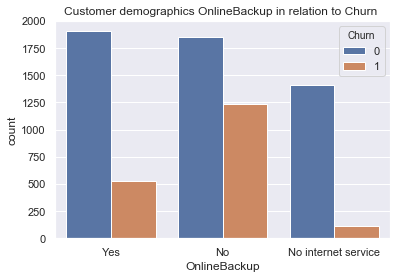

In [91]:
ax = sns.countplot(x="OnlineBackup", hue="Churn", data=data_churn)
ax.set_title("Customer demographics OnlineBackup in relation to Churn ")

Text(0.5, 1.0, 'Customer demographics  TechSupport in relation to Churn or not Churn')

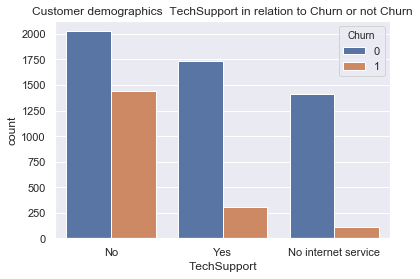

In [92]:
ax = sns.countplot(x="TechSupport", hue="Churn", data=data_churn)
ax.set_title("Customer demographics  TechSupport in relation to Churn or not Churn")

Text(0.5, 1.0, 'Customer demographics MultipleLines in relation to Churn or not Churn')

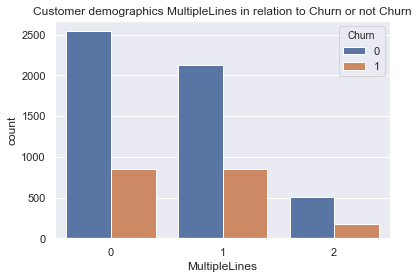

In [94]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data=data_churn)
ax.set_title("Customer demographics MultipleLines in relation to Churn or not Churn")

# Count all customers who's Churn or not  use DeviceProtection

Text(0.5, 1.0, 'Customer demographics  DeviceProtection in relation to Churn or not Churn')

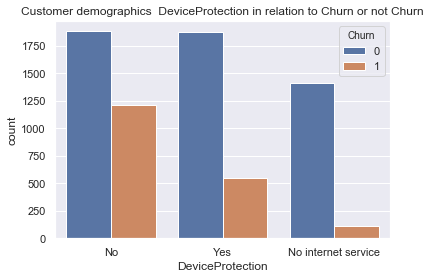

In [96]:
ax = sns.countplot(x="DeviceProtection", hue="Churn", data=data_churn)
ax.set_title("Customer demographics  DeviceProtection in relation to Churn or not Churn")

# Billing information
# The Churn Billing the compagny let's see by the information that we received by the company

In [97]:
data_churn['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [98]:
data_churn['PaymentMethod'].describe().to_frame()

,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365


Text(0.5, 1.0, 'Customer demographics Churn by PaymentMethod ')

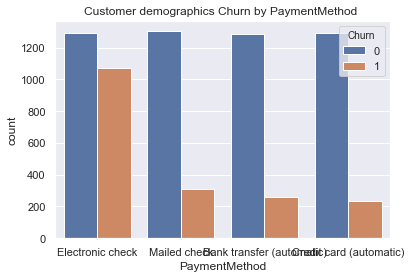

In [99]:
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=data_churn)
ax.set_title("Customer demographics Churn by PaymentMethod ")

Text(0.5, 1.0, 'Customer demographics Churn by PaperlessBilling ')

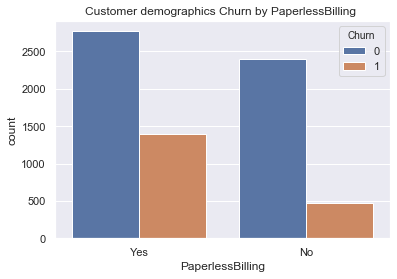

In [100]:
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=data_churn)
ax.set_title("Customer demographics Churn by PaperlessBilling ")

## Let's see the monthly income of the comagny by Churn


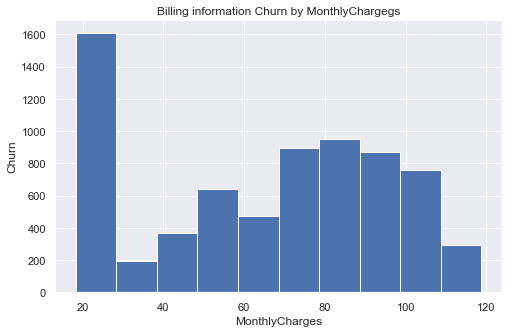

In [101]:
data_churn['MonthlyCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by MonthlyChargegs') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('MonthlyCharges') # add x-label

plt.show()

In [102]:
totalmonth = data_churn[['MonthlyCharges','Churn']]
totalmonthly = totalmonth.groupby(['Churn']).sum()
a = totalmonthly/totalmonth.sum()
round(100 * a,2)

,Churn,MonthlyCharges
Churn,,
0,NaN,69.5
1,NaN,30.5


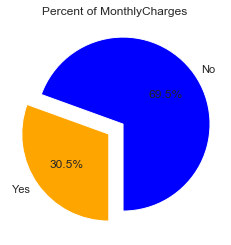

In [103]:
sizes = (69.47,30.53)
colors = ["blue","orange"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of MonthlyCharges ')
plt.show()

In [104]:
data_churn['tenure'].describe().to_frame()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


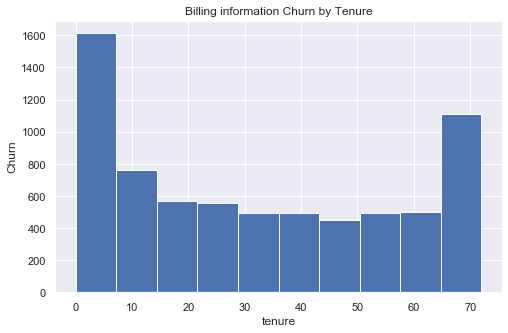

In [105]:
data_churn['tenure'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by Tenure') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('tenure') # add x-label

plt.show()

In [110]:
data_churn['TotalCharges'].describe().to_frame()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [111]:
data_churn['TotalCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by TotalCharges') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('TotalCharges') # add x-label

plt.show()

TypeError: no numeric data to plot

In [109]:
totalch = data_churn[['TotalCharges','Churn']]
totalcha = totalch.groupby(['Churn']).sum()
a = totalcha/totalch.sum()
round(100 * a,2)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### Percent of loss of profit caused by the Total Churn

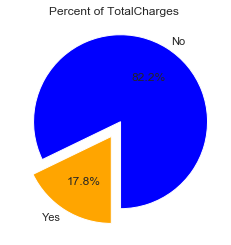

In [113]:
sizes = (82.17,17.83)
colors = ["blue","orange"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of TotalCharges ')
plt.show()

### The Churn affect the business by a 17.8% loss of total revenue

# 3.  Services are typically purchased by customers who churned

In [114]:
cols = data_churn.columns
cols = list(cols)
display(cols)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [115]:
services_1= data_churn.groupby('Churn').mean()
services_1

,gender,SeniorCitizen,tenure,MultipleLines,MonthlyCharges
Churn,,,,,
0,0.492656,0.128721,37.569965,0.607847,61.265124
1,0.502408,0.254682,17.979133,0.636704,74.441332


In [116]:
val = data_churn[data_churn.Churn=='Yes']
val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [56]:
ustomerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4

SyntaxError: invalid syntax (<ipython-input-56-d396dd3315bb>, line 1)

In [61]:
columns= data_churn.columns [data_churn.columns.dtype == 'object']
ignore_col = ['customerID','TotalCharges']
columns = columns[0]
columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [62]:
num_cat   = [x for x in columns if x not in ignore_col]



In [63]:
num_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [64]:
categorical = data_churn[num_cat]

In [65]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [66]:
#### sexe
# Female -> 1
# Male  -> 0
dict_gender = {"Female": 1, "Male": 0}
categorical['gender'] =categorical['gender'].replace(dict_gender)

In [67]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [68]:
set(categorical['MultipleLines'])

{'No', 'No phone service', 'Yes'}

In [69]:
dict_mult= {'No': 0,"Yes":1, "No phone service" : 2}

In [70]:
categorical['MultipleLines'] =categorical['MultipleLines'].replace(dict_mult)

In [71]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,Yes,No,1,No,2,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,0,No,No,34,Yes,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,0,No,No,2,Yes,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,0,No,No,45,No,2,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,1,0,No,No,2,Yes,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [72]:
dict_churn= {'No': 0,"Yes":1}

In [73]:
categorical['Churn'] =categorical['Churn'].replace(dict_churn)

In [74]:
data_churn[num_cat] =categorical[num_cat]

In [75]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,2,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,No,No,34,Yes,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,No,No,45,No,2,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


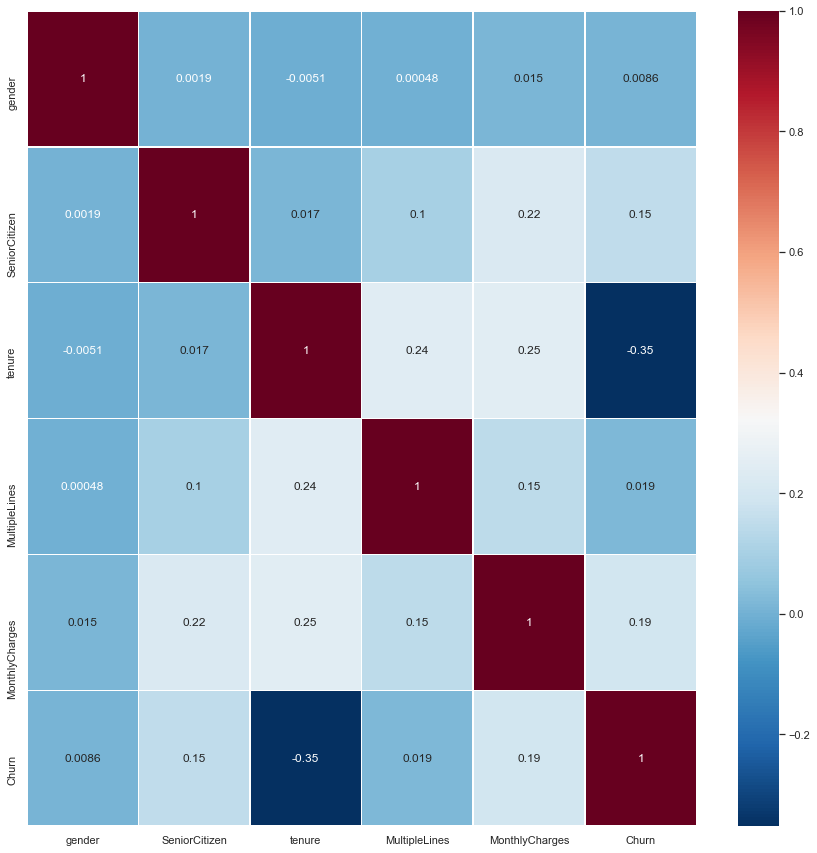

In [76]:
plt.figure(figsize = (15,15))
sns.heatmap(data_churn.corr(),annot =True, linewidth = 0.6,cmap ='RdBu_r')
plt.show()

In [ ]:
y = []

### Another Way of Analyzing Data
## Data manipulation and Graph

In [ ]:
#Data Manipulation

#Replacing spaces with null values in total charges column
data_churn['TotalCharges'] = data_churn["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
data_churn = data_churn[data_churn["TotalCharges"].notnull()]
data_churn = data_churn.reset_index()[data_churn.columns]

#convert to float type
data_churn["TotalCharges"] = data_churn["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data_churn[i]  = data_churn[i].replace({'No internet service' : 'No'})
    
#replace values
data_churn["SeniorCitizen"] = data_churn["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(data_churn) :
    
    if data_churn["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data_churn["tenure"] > 12) & (data_churn["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data_churn["tenure"] > 24) & (data_churn["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data_churn["tenure"] > 48) & (data_churn["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data_churn["tenure"] > 60 :
        return "Tenure_gt_60"
data_churn["tenure_group"] = data_churn.apply(lambda data_churn:tenure_lab(data_churn),
                                      axis = 1)

#Separating churn and non churn customers
churn     = data_churn[data_churn["Churn"] == "Yes"]
not_churn = data_churn[data_churn["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = data_churn.nunique()[data_churn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data_churn.columns if x not in cat_cols + target_col + Id_col]

In [ ]:
#labels
lab = data_churn["Churn"].value_counts().keys().tolist()
#values
val = data_churn["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [ ]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(data_churn)

### 4 BONUS !!!

In [117]:
quantity_df = 7043
churn_rate = 0.2654
day = 0

In [118]:
while quantity_df >=1:
    quantity_df = quantity_df - (quantity_df * (churn_rate))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [119]:
#sex
### Female
Qt_Female= 3488
Churn_percent1 = 0.2692
day1 = 0

while Qt_Female >=1:
    Qt_Female = Qt_Female -(Qt_Female * (Churn_percent1))
    day1 +=1
    print(day1)
    
    #sex
### Male
Qt_Male= 3555
Churn_percent2 = 0.2641
day1 = 0

while Qt_Male >=1:
    Qt_Male = Qt_Male -(Qt_Male * (Churn_percent2))
    day1 +=1
    print(day1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [120]:
# partner
### part no
Qt_part_no= 3641
Churn_percent2 = 0.4916
day1 = 0

while Qt_part_no >=1:
    Qt_part_no = Qt_part_no -(Qt_part_no * (Churn_percent2))
    day1 +=1
    print(day1)

# partner
### part yes
Qt_part_yes= 3402
Churn_percent2 = 0.2692
day1 = 0

while Qt_part_yes >=1:
    Qt_part_yes = Qt_part_yes -(Qt_part_yes * (Churn_percent2))
    day1 +=1
    print(day1)

1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


### Demographics clients who are not Dependents will only take five days to churn

In [121]:
# Dependents
### dep_yes
Qt_dep_yes= 2110
Churn_percent2 = 0.1744
day1 = 0

while Qt_dep_yes >=1:
    Qt_dep_yes = Qt_dep_yes -(Qt_dep_yes * (Churn_percent2))
    day1 +=1
    print(day1)

### dep_no
Qt_dep_no= 4933
Churn_percent2 = 0.8256
day1 = 0

while Qt_dep_no >=1:
    Qt_dep_no = Qt_dep_no -(Qt_dep_no * (Churn_percent2))
    day1 +=1
    print('Demographics clients who are not Dependents will only take five days to churn',day1)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Demographics clients who are not Dependents will only take five days to churn 1
Demographics clients who are not Dependents will only take five days to churn 2
Demographics clients who are not Dependents will only take five days to churn 3
Demographics clients who are not Dependents will only take five days to churn 4
Demographics clients who are not Dependents will only take five days to churn 5


### Demographics clients who are not Dependents will only take five days to churn

In [122]:
# SeniorCitizen
### young
Qt_young= 5902
Churn_percent2 = 0.7453
day1 = 0

while Qt_young >=1:
    Qt_young = Qt_young -(Qt_young * (Churn_percent2))
    day1 +=1
    print(day1)

# SeniorCitizen
### adult
Qt_adult= 1142
Churn_percent2 = 0.2547
day1 = 0

while Qt_adult>=1:
    Qt_adult = Qt_adult -(Qt_adult * (Churn_percent2))
    day1 +=1
    print(day1)


1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


###
### Week 2
Add to your presentation from Week 1. Create analyses that answer the following questions:
Are there types of people who churn at higher rates? Come up with 2-3 profiles to give executives an idea of who churns often. Try to look several factors deep for example: people with no internet service and no phone service, or women who are senior citizens  See FAQ for details. 
Create a case study for one of your customer profiles. Show how much additional revenue you could make by increasing sales by 10% in that profile.
Do you have any recommendations on how to reach groups of people who churn at high rates?

FAQ
What is a customer profile? It’s a device used to tell a story about customers by providing an example of what a typical customer is.  A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.



### Change variable categorical value in numerical value

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
liste = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
liste1= []
for d in liste :
    if  data_churn[d].dtypes == 'object':
        liste1.append(d)
liste1

['Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [125]:
dat = data_churn[liste1]
dat

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7040,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6


In [126]:
catego_numeric = dat.apply(LabelEncoder().fit_transform)
catego_numeric

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,1,0,0,0,0,2,0,0,0,0,0,1,2,2505
1,0,0,1,0,2,0,2,0,0,0,1,0,3,1466
2,0,0,1,0,2,2,0,0,0,0,0,1,3,157
3,0,0,0,0,2,0,2,2,0,0,1,0,0,1400
4,0,0,1,1,0,0,0,0,0,0,0,1,2,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,2,0,2,2,2,2,1,1,3,1597
7039,1,1,1,1,0,2,2,0,2,2,1,1,1,5698
7040,1,1,0,0,2,0,0,0,0,0,0,1,2,2994
7041,1,0,1,1,0,0,0,0,0,0,0,1,3,2660


## Here we make our Model

In [127]:
liste = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
liste2= []
for d in liste :
    if data_churn[d].dtypes != 'object':
        liste2.append(d)
liste2

['SeniorCitizen', 'tenure', 'MultipleLines', 'MonthlyCharges', 'Churn']

In [128]:
dfnum = data_churn[liste2]
dfnum

,SeniorCitizen,tenure,MultipleLines,MonthlyCharges,Churn
0,0,1,2,29.85,0
1,0,34,0,56.95,0
2,0,2,0,53.85,1
3,0,45,2,42.30,0
4,0,2,0,70.70,1
...,...,...,...,...,...
7038,0,24,1,84.80,0
7039,0,72,1,103.20,0
7040,0,11,2,29.60,0
7041,1,4,1,74.40,1


In [129]:
model=pd.concat([catego_numeric, dfnum], axis = 1) 
model

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MultipleLines,MonthlyCharges,Churn
0,1,0,0,0,0,2,0,0,0,0,0,1,2,2505,0,1,2,29.85,0
1,0,0,1,0,2,0,2,0,0,0,1,0,3,1466,0,34,0,56.95,0
2,0,0,1,0,2,2,0,0,0,0,0,1,3,157,0,2,0,53.85,1
3,0,0,0,0,2,0,2,2,0,0,1,0,0,1400,0,45,2,42.30,0
4,0,0,1,1,0,0,0,0,0,0,0,1,2,925,0,2,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,2,0,2,2,2,2,1,1,3,1597,0,24,1,84.80,0
7039,1,1,1,1,0,2,2,0,2,2,1,1,1,5698,0,72,1,103.20,0
7040,1,1,0,0,2,0,0,0,0,0,0,1,2,2994,0,11,2,29.60,0
7041,1,0,1,1,0,0,0,0,0,0,0,1,3,2660,1,4,1,74.40,1


In [130]:
y = model['Churn']
x = model[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [131]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size= 0.3,random_state=0)
print('Show the Train set :',x_train.shape, y_train.shape)
print('Show the Test set :',x_test.shape, y_test.shape)

Show the Train set : (4930, 18) (4930,)
Show the Test set : (2113, 18) (2113,)


In [132]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
predict_ = lr.predict(x_train)
predict_

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [134]:
#predict_frame = pd.DataFrame({'predict_':predict_[:]})
#predict_frame

In [135]:
lr.score(x_test,y_test)

0.7960246095598675

In [136]:
round(lr.score(x_test,y_test),2)

0.8